In [1]:
# TODO:
#1) Verificar a projeção correta;
#2) Verificar os níveis sigma corretos
#3) Verificar os níveis de pressão corretos
#4) Colocar as datas corretas

from py3grads import Grads
import numpy as np

In [2]:
ga = Grads(verbose=False)

In [17]:
anl = ga("open BAM.anl.gsi.bin.ctl")
anl_env=ga.env()

In [11]:
bkg = ga("open BAM.fct.06.bin.ctl")
bkg_env=ga.env()

In [12]:
ga(f"set z 1 28")

(['LEV set to 1 28 ', ''], 0)

In [13]:
anl_T = ga.exp("tmpv.1(t=1)")
bkg_T = ga.exp("tmpv.2(t=1)")

In [14]:
import xarray as xr

# This setup should be common between bkg and anl arrays
menv = ga.env()
ipts = menv.nx
jpts = menv.ny
lons = np.linspace(0,360,ipts)
lats = np.linspace(-90,90,jpts)
levs = np.arange(1,29)

dateanl = anl_env.time
datefct = bkg_env.time

# Background array
da_bkg_T = xr.DataArray(bkg_T,                      \
                        name="tmpv",                \
                        coords={"dateanl": dateanl, \
                                "datefct": datefct, \
                                "lat": lats,        \
                                "lon": lons,        \
                                "lev": levs},
                        dims=["lat", "lon", "lev"])
da_bkg_T.attrs["Units"] = "K"
da_bkg_T.attrs["Long Name"] = "VIRTUAL TEMPERATURE"

# Analysis array
da_anl_T = xr.DataArray(anl_T,                      \
                        name="tmpv",                \
                        coords={"dateanl": dateanl, \
                                "datefct": dateanl, \
                                "lat": lats,        \
                                "lon": lons,        \
                                "lev": levs},
                        dims=["lat", "lon", "lev"])
da_anl_T.attrs["Units"] = "K"
da_anl_T.attrs["Long Name"] = "VIRTUAL TEMPERATURE"

In [15]:
da_bkg_T

<xarray.DataArray 'tmpv' (lat: 96, lon: 193, lev: 28)>
array([[[220.769608, 225.732208, ..., 206.683304, 216.579498],
        [220.778503, 225.699554, ..., 206.686493, 216.596115],
        ...,
        [220.761536, 225.765381, ..., 206.680038, 216.563873],
        [220.769608, 225.732208, ..., 206.683304, 216.579498]],

       [[223.012787, 226.728714, ..., 207.00589 , 215.768448],
        [222.934525, 226.622955, ..., 207.013611, 215.796844],
        ...,
        [223.092514, 226.838516, ..., 206.996643, 215.743011],
        [223.012787, 226.728714, ..., 207.00589 , 215.768448]],

       ...,

       [[263.246246, 262.322784, ..., 234.672211, 247.731552],
        [263.337433, 262.401947, ..., 234.675873, 247.739914],
        ...,
        [263.156097, 262.243073, ..., 234.667908, 247.722763],
        [263.246246, 262.322784, ..., 234.672211, 247.731552]],

       [[264.422211, 263.169159, ..., 234.535324, 247.475632],
        [264.471771, 263.217224, ..., 234.537064, 247.479202],
     

In [9]:
da_anl_T

<xarray.DataArray 'tmpv' (lat: 96, lon: 193, lev: 28)>
array([[[220.769608, 225.732208, ..., 206.683319, 216.579514],
        [220.778488, 225.699554, ..., 206.686493, 216.59613 ],
        ...,
        [220.761536, 225.765381, ..., 206.680038, 216.563889],
        [220.769608, 225.732208, ..., 206.683319, 216.579514]],

       [[223.012772, 226.728714, ..., 207.00589 , 215.768448],
        [222.934525, 226.622955, ..., 207.013611, 215.79686 ],
        ...,
        [223.092499, 226.838516, ..., 206.996643, 215.743011],
        [223.012772, 226.728714, ..., 207.00589 , 215.768448]],

       ...,

       [[263.246246, 262.322784, ..., 234.672211, 247.731552],
        [263.337433, 262.401947, ..., 234.675858, 247.739899],
        ...,
        [263.156067, 262.243073, ..., 234.667908, 247.722763],
        [263.246246, 262.322784, ..., 234.672211, 247.731552]],

       [[264.42215 , 263.169098, ..., 234.535309, 247.475632],
        [264.47171 , 263.217163, ..., 234.537048, 247.479202],
     

In [10]:
da_incr_T = da_anl_T - da_bkg_T

In [11]:
da_incr_T

<xarray.DataArray 'tmpv' (lat: 96, lon: 193, lev: 28)>
array([[[ 0.000000e+00,  0.000000e+00, ...,  1.525879e-05,  1.525879e-05],
        [-1.525879e-05,  0.000000e+00, ...,  0.000000e+00,  1.525879e-05],
        ...,
        [ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  1.525879e-05],
        [ 0.000000e+00,  0.000000e+00, ...,  1.525879e-05,  1.525879e-05]],

       [[-1.525879e-05,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  1.525879e-05],
        ...,
        [-1.525879e-05,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [-1.525879e-05,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00]],

       ...,

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00, ..., -1.525879e-05, -1.525879e-05],
        ...,
        [-3.051758e-05,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.00

In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes

data = [da_bkg_T.isel(lev=0), da_anl_T.isel(lev=0), da_incr_T.isel(lev=0)]

projection = ccrs.PlateCarree(central_longitude=0)
axes_class = (GeoAxes,dict(map_projection=projection))

fig = plt.figure(figsize=(20,15), dpi=80)

# View https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html for more options
axgr = AxesGrid(fig,111,
                axes_class=axes_class,
                nrows_ncols=(1,len(data)),
                axes_pad=1,
                cbar_pad=0.1,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="5%",
                label_mode='')  # note the empty label_mode

for i, ax in enumerate(axgr):
    ax.coastlines()
    ax.set_xticks(np.linspace(-180, 180, 5), crs=projection)
    ax.set_yticks(np.linspace(-90, 90, 5), crs=projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.gridlines(crs=projection, 
                 draw_labels=False,
                 linewidth=0.5, 
                 color="black", 
                 alpha=0.5, 
                 linestyle="--")
    
    if i == 2: # da_incr_T   
        vmin = 0; vmax = 0.075
    else:
        vmin = 220; vmax = 320
   
    #p = ax.pcolormesh(lons, lats, data[i], transform=projection, cmap="RdYlBu_r", vmin=vmin, vmax=vmax)
    p = ax.contourf(lons, lats, data[i], transform=projection, cmap="RdYlBu_r", vmin=vmin, vmax=vmax)   

    if i == 0:
        ax.set_title("Bkg. T [$^\circ$C]\n %s" % str(datefct), size=15)
    elif i == 1:
        ax.set_title("Anl. T [$^\circ$C]\n %s" % str(dateanl), size=15)
        ax.plot(279,38, 'bo', markersize=7, transform=projection, color="black")
    if i == 2:
        ax.set_title("Anl. Incr. T [$^\circ$C]\n %s" % str(dateanl), size=15)
    
    axgr.cbar_axes[i].colorbar(p)

plt.suptitle("Global GSI Analysis Increment for $t$ observation at 500 hPa\n(lat=38N, lon=81W, 2015043006)",size=20)

plt.tight_layout(rect=[0, 0.03, 1, 1.55])
    
plt.savefig("./incr_anl_latXlon.png")

/home/carlos/anaconda3/envs/DasDev/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


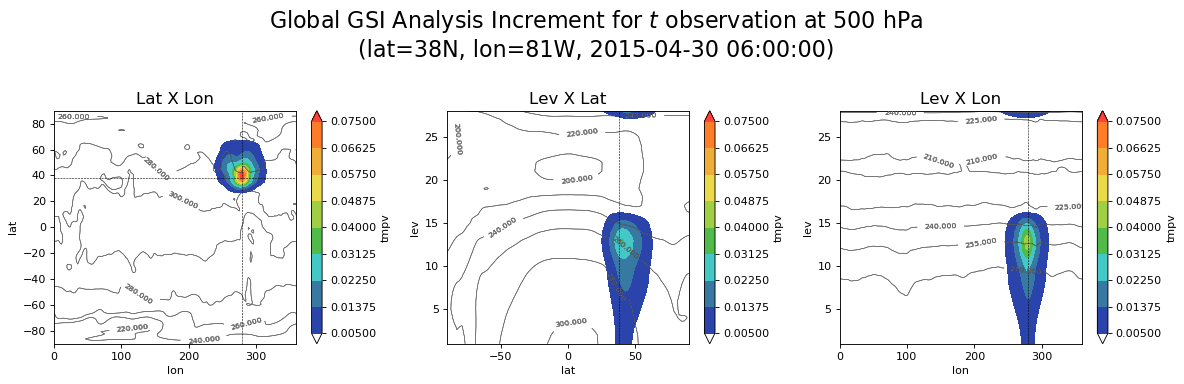

In [13]:
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from mpl_toolkits.axisartist import inset_axes
#mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

mpl.rc("lines", linewidth=0.5)

fig, axes = plt.subplots(figsize=(15,5), ncols=3, nrows=1, dpi=80)

anl_vals_lats = da_anl_T.mean(dim="lon").transpose("lev","lat")
bkg_vals_lats = da_bkg_T.mean(dim="lon").transpose("lev","lat")
incr_vals_lats = (anl_vals_lats - bkg_vals_lats)

anl_vals_lons = da_anl_T.mean(dim="lat").transpose("lev","lon")
bkg_vals_lons = da_bkg_T.mean(dim="lat").transpose("lev","lon")
incr_vals_lons = (anl_vals_lons - bkg_vals_lons)

kwargs={"vmin":0.005, 
        "vmax":0.075, 
        "levels":9, 
        "colors":["#FFFFFF","#2A44AC","#3779A3","#43C8C6","#51BB49","#A1CF44","#EADA4A","#F0AD38","#FF7D28","#FF4238"], 
        "extend":'both'}

# lat X lon
da_incr_T.isel(lev=0).plot.contourf(**kwargs, ax=axes[0])
c1 = da_bkg_T.isel(lev=0).plot.contour(add_colorbar=False, colors=["black"], ax=axes[0])
c2 = da_anl_T.isel(lev=0).plot.contour(add_colorbar=False, colors=["grey"], ax=axes[0])
axes[0].axhline(y=38, color="black", linestyle='--')
axes[0].axvline(x=279, color="black", linestyle='--')
axes[0].clabel(c1, inline=1, fontsize=7)
axes[0].clabel(c2, inline=1, fontsize=7)
axes[0].set_title("Lat X Lon",size=15)

# lev X lat
da_incr_T.mean(dim="lon").transpose("lev","lat").plot.contourf(**kwargs, ax=axes[1])
c1 = bkg_vals_lats.plot.contour(add_colorbar=False, colors=["black"], ax=axes[1])
c2 = anl_vals_lats.plot.contour(add_colorbar=False, colors=["grey"], ax=axes[1])
axes[1].clabel(c1, inline=1, fontsize=7)
axes[1].clabel(c2, inline=1, fontsize=7)
axes[1].axvline(x=38, color="black", linestyle='--')
axes[1].set_title("Lev X Lat",size=15)

# lev X lon 
da_incr_T.mean(dim="lat").transpose("lev","lon").plot.contourf(**kwargs, ax=axes[2])
c1 = bkg_vals_lons.plot.contour(add_colorbar=False, colors=["black"], ax=axes[2])
c2 = anl_vals_lons.plot.contour(add_colorbar=False, colors=["grey"], ax=axes[2])
axes[2].clabel(c1, inline=1, fontsize=7)
axes[2].clabel(c2, inline=1, fontsize=7)
axes[2].axvline(x=279, color="black", linestyle='--')
axes[2].set_title("Lev X Lon",size=15)

plt.suptitle("Global GSI Analysis Increment for $t$ observation at 500 hPa\n(lat=38N, lon=81W, %s)" % str(dateanl),size=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.8])

plt.savefig("./incr_anl_projs.png")

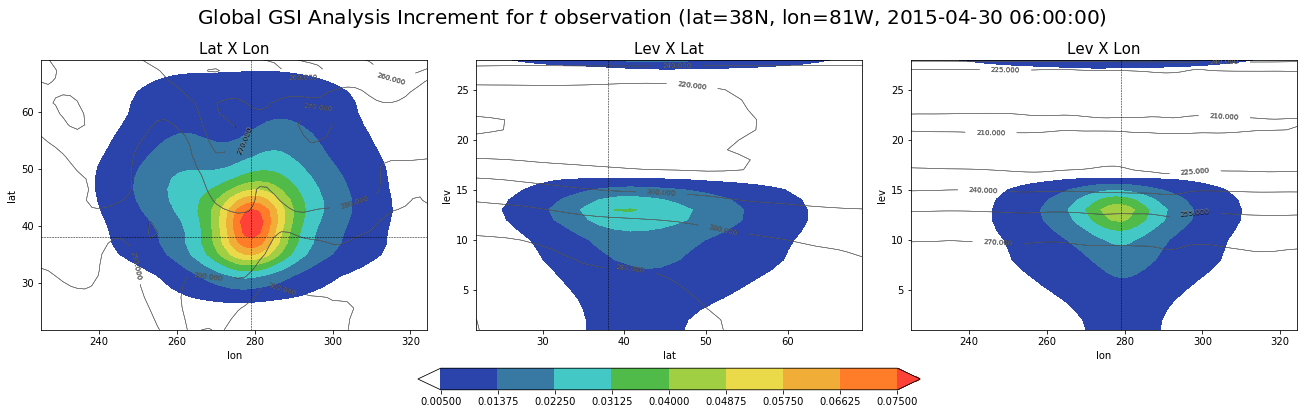

In [14]:
fig = plt.figure(figsize=(18,5), constrained_layout=True)
gs = fig.add_gridspec(1, 3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
#ax3 = fig.add_subplot(gs[1, :]) # merge cells

anl_vals_lats = da_anl_T.mean(dim="lon").transpose("lev","lat")
bkg_vals_lats = da_bkg_T.mean(dim="lon").transpose("lev","lat")

incr_vals_lats = (anl_vals_lats - bkg_vals_lats)

anl_vals_lons = da_anl_T.mean(dim="lat").transpose("lev","lon")
bkg_vals_lons = da_bkg_T.mean(dim="lat").transpose("lev","lon")
incr_vals_lons = (anl_vals_lons - bkg_vals_lons)

kwargs={"vmin":0.005, 
        "vmax":0.075, 
        "levels":9, 
        "colors":["#FFFFFF","#2A44AC","#3779A3","#43C8C6","#51BB49","#A1CF44","#EADA4A","#F0AD38","#FF7D28","#FF4238"], 
        "extend":'both'}

# lat X lon
c0 = da_incr_T.sel(lev=1,lon=slice(225,325),lat=slice(20,70)).plot.contourf(**kwargs, add_colorbar=False, ax=ax0)
c1 = da_bkg_T.sel(lev=1,lon=slice(225,325),lat=slice(20,70)).plot.contour(add_colorbar=False, colors=["black"], ax=ax0)
c2 = da_anl_T.sel(lev=1,lon=slice(225,325),lat=slice(20,70)).plot.contour(add_colorbar=False, colors=["grey"], ax=ax0)
ax0.axhline(y=38, color="black", linestyle='--')
ax0.axvline(x=279, color="black", linestyle='--')
ax0.clabel(c1, inline=1, fontsize=7)
ax0.clabel(c2, inline=1, fontsize=7)
ax0.set_title("Lat X Lon",size=15)

# lev X lat
da_incr_T.sel(lat=slice(20,70)).mean(dim="lon").transpose("lev","lat").plot.contourf(**kwargs, add_colorbar=False, ax=ax1)
c1 = bkg_vals_lats.sel(lat=slice(20,70)).plot.contour(add_colorbar=False, colors=["black"], ax=ax1)
c2 = anl_vals_lats.sel(lat=slice(20,70)).plot.contour(add_colorbar=False, colors=["grey"], ax=ax1)
ax1.clabel(c1, inline=1, fontsize=7)
ax1.clabel(c2, inline=1, fontsize=7)
ax1.axvline(x=38, color="black", linestyle='--')
ax1.set_title("Lev X Lat",size=15)

# lev X lon 
da_incr_T.sel(lon=slice(225,325)).mean(dim="lat").transpose("lev","lon").plot.contourf(**kwargs, add_colorbar=False, ax=ax2)
c1 = bkg_vals_lons.sel(lon=slice(225,325)).plot.contour(add_colorbar=False, colors=["black"], ax=ax2)
c2 = anl_vals_lons.sel(lon=slice(225,325)).plot.contour(add_colorbar=False, colors=["grey"], ax=ax2)
ax2.clabel(c1, inline=1, fontsize=7)
ax2.clabel(c2, inline=1, fontsize=7)
ax2.axvline(x=279, color="black", linestyle='--')
ax2.set_title("Lev X Lon",size=15)

axins = inset_axes(ax1,
                    width="130%",  
                    height="8%",   
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax1.transAxes,
                    borderpad=-6,
                    loc="lower center")
fig.colorbar(c0, orientation="horizontal", cax=axins)

plt.suptitle("Global GSI Analysis Increment for $t$ observation (lat=38N, lon=81W, %s)" % str(dateanl),size=20)

plt.savefig("./incr_anl_projs.png")

#plt.tight_layout(rect=[0, 0.03, 1, 0.75])